In [1]:
import numpy as np
import pandas as pd
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pip install seaborn

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
cd drive/My\ Drive/CS4774

/content/drive/My Drive/CS4774


In [0]:
cleaned_data = pd.read_csv('clean_data_5class.csv')

In [0]:
LabelFatalities = cleaned_data['Fatal_Crashes']
cleaned_data = cleaned_data.drop('Fatal_Crashes', axis = 1)

In [0]:
cleaned_data = cleaned_data.drop('Physical_Juris', axis = 1)
cleaned_data = cleaned_data.drop('PLAN_DISTRICT', axis = 1)

In [8]:
thearray = []
for col in cleaned_data.columns:
  if("First" in col):
    thearray.append(col)
print(thearray)

['First_Harmful_Event_of_Entire_1. On Roadway', 'First_Harmful_Event_of_Entire_2. Shoulder', 'First_Harmful_Event_of_Entire_3. Median', 'First_Harmful_Event_of_Entire_4. Roadside', 'First_Harmful_Event_of_Entire_5. Gore', 'First_Harmful_Event_of_Entire_6. Separator', 'First_Harmful_Event_of_Entire_7. In Parking Lane or Zone', 'First_Harmful_Event_of_Entire_8. Off Roadway, Location Unknown', 'First_Harmful_Event_of_Entire_9. Outside Right-of-Way']


In [0]:
todrop1 = ['First_Harmful_Event_of_Entire_1. On Roadway', 'First_Harmful_Event_of_Entire_2. Shoulder', 'First_Harmful_Event_of_Entire_3. Median', 'First_Harmful_Event_of_Entire_4. Roadside', 'First_Harmful_Event_of_Entire_5. Gore', 'First_Harmful_Event_of_Entire_6. Separator', 'First_Harmful_Event_of_Entire_7. In Parking Lane or Zone', 'First_Harmful_Event_of_Entire_8. Off Roadway, Location Unknown', 'First_Harmful_Event_of_Entire_9. Outside Right-of-Way']

In [0]:
for i in range(len(todrop1)):
  todrop1[i] = todrop1[i].strip('\n')

In [0]:
cleaned_data = cleaned_data.drop(todrop1, axis = 1)

In [12]:
the2ndarray = []
for col in cleaned_data.columns:
  if("Crash_Event_Type" in col):
    the2ndarray.append(col)
print(the2ndarray)

['Crash_Event_Type_Dsc_1. Bank Or Ledge', 'Crash_Event_Type_Dsc_10. Other', 'Crash_Event_Type_Dsc_11. Jersey Wall', 'Crash_Event_Type_Dsc_12. Building/Structure', 'Crash_Event_Type_Dsc_13. Curb', 'Crash_Event_Type_Dsc_14. Ditch', 'Crash_Event_Type_Dsc_15. Other Fixed Object', 'Crash_Event_Type_Dsc_16. Other Traffic Barrier', 'Crash_Event_Type_Dsc_17. Traffic Sign Support', 'Crash_Event_Type_Dsc_18. Mailbox', 'Crash_Event_Type_Dsc_19. Ped', 'Crash_Event_Type_Dsc_2. Trees', 'Crash_Event_Type_Dsc_20. Motor Vehicle In Transport', 'Crash_Event_Type_Dsc_21. Train', 'Crash_Event_Type_Dsc_22. Bicycle', 'Crash_Event_Type_Dsc_23. Animal', 'Crash_Event_Type_Dsc_24. Work Zone Maintenance Equipment', 'Crash_Event_Type_Dsc_25. Other Movable Object', 'Crash_Event_Type_Dsc_26. Unknown Movable Object', 'Crash_Event_Type_Dsc_27. Other', 'Crash_Event_Type_Dsc_28. Ran Off Road', 'Crash_Event_Type_Dsc_29. Jack Knife', 'Crash_Event_Type_Dsc_3. Utility Pole', 'Crash_Event_Type_Dsc_30. Overturn (Rollover)', '

In [0]:
todrop2 = ['Crash_Event_Type_Dsc_1. Bank Or Ledge', 'Crash_Event_Type_Dsc_10. Other', 'Crash_Event_Type_Dsc_11. Jersey Wall', 'Crash_Event_Type_Dsc_12. Building/Structure', 'Crash_Event_Type_Dsc_13. Curb', 'Crash_Event_Type_Dsc_14. Ditch', 'Crash_Event_Type_Dsc_15. Other Fixed Object', 'Crash_Event_Type_Dsc_16. Other Traffic Barrier', 'Crash_Event_Type_Dsc_17. Traffic Sign Support', 'Crash_Event_Type_Dsc_18. Mailbox', 'Crash_Event_Type_Dsc_19. Ped', 'Crash_Event_Type_Dsc_2. Trees', 'Crash_Event_Type_Dsc_20. Motor Vehicle In Transport', 'Crash_Event_Type_Dsc_21. Train', 'Crash_Event_Type_Dsc_22. Bicycle', 'Crash_Event_Type_Dsc_23. Animal', 'Crash_Event_Type_Dsc_24. Work Zone Maintenance Equipment', 'Crash_Event_Type_Dsc_25. Other Movable Object', 'Crash_Event_Type_Dsc_26. Unknown Movable Object', 'Crash_Event_Type_Dsc_27. Other', 'Crash_Event_Type_Dsc_28. Ran Off Road', 'Crash_Event_Type_Dsc_29. Jack Knife', 'Crash_Event_Type_Dsc_3. Utility Pole', 'Crash_Event_Type_Dsc_30. Overturn (Rollover)', 'Crash_Event_Type_Dsc_31. Downhill Runaway', 'Crash_Event_Type_Dsc_32. Cargo Loss or Shift', 'Crash_Event_Type_Dsc_33. Explosion or Fire', 'Crash_Event_Type_Dsc_34. Separation of Units', 'Crash_Event_Type_Dsc_35. Cross Median', 'Crash_Event_Type_Dsc_36. Cross Centerline', 'Crash_Event_Type_Dsc_37. Equipment Failure (Tire, etc)', 'Crash_Event_Type_Dsc_38. Immersion', 'Crash_Event_Type_Dsc_39. Fell/Jumped From Vehicle', 'Crash_Event_Type_Dsc_4. Fence Or Post', 'Crash_Event_Type_Dsc_40. Thrown or Falling Object', 'Crash_Event_Type_Dsc_41. Non-Collision Unknown', 'Crash_Event_Type_Dsc_42. Other Non-Collision', 'Crash_Event_Type_Dsc_5. Guard Rail', 'Crash_Event_Type_Dsc_6. Parked Vehicle', 'Crash_Event_Type_Dsc_7. Tunnel, Bridge, Underpass, Culvert, etc.', 'Crash_Event_Type_Dsc_8. Sign, Traffic Signal', 'Crash_Event_Type_Dsc_9. Impact Cushioning Device', 'Crash_Event_Type_Dsc_Not Provided']

In [0]:
cleaned_data = cleaned_data.drop(todrop2, axis = 1)

In [15]:
the3rdarray = []
for col in cleaned_data.columns:
  if("Driver_Action" in col):
    the3rdarray.append(col)
print(the3rdarray)

['Driver_Action_Type_Cd_1. No Improper Action', 'Driver_Action_Type_Cd_10. Wrong Side Of Road - Not Overtaking', 'Driver_Action_Type_Cd_11. Did Not Have Right-of-Way', 'Driver_Action_Type_Cd_12. Following Too Close', 'Driver_Action_Type_Cd_13. Fail to Signal or Improper Signal', 'Driver_Action_Type_Cd_14. Improper Turn - Wide Right Turn', 'Driver_Action_Type_Cd_15. Improper Turn - Cut Corner on Left Turn', 'Driver_Action_Type_Cd_16. Improper Turn From Wrong Lane', 'Driver_Action_Type_Cd_17. Other Improper Turn', 'Driver_Action_Type_Cd_18. Improper Backing', 'Driver_Action_Type_Cd_19. Improper Start From Parked Position', 'Driver_Action_Type_Cd_2. Exceeded Speed Limit', 'Driver_Action_Type_Cd_20. Disregarded Officer or Flagger', 'Driver_Action_Type_Cd_21. Disregarded Traffic Signal', 'Driver_Action_Type_Cd_22. Disregarded Stop or Yield Sign', 'Driver_Action_Type_Cd_23. Driver Distraction', 'Driver_Action_Type_Cd_24. Fail to Stop at Through Highway - No Sign', 'Driver_Action_Type_Cd_25. 

In [0]:
todrop3 = ['Driver_Action_Type_Cd_1. No Improper Action', 'Driver_Action_Type_Cd_10. Wrong Side Of Road - Not Overtaking', 'Driver_Action_Type_Cd_11. Did Not Have Right-of-Way', 'Driver_Action_Type_Cd_12. Following Too Close', 'Driver_Action_Type_Cd_13. Fail to Signal or Improper Signal', 'Driver_Action_Type_Cd_14. Improper Turn - Wide Right Turn', 'Driver_Action_Type_Cd_15. Improper Turn - Cut Corner on Left Turn', 'Driver_Action_Type_Cd_16. Improper Turn From Wrong Lane', 'Driver_Action_Type_Cd_17. Other Improper Turn', 'Driver_Action_Type_Cd_18. Improper Backing', 'Driver_Action_Type_Cd_19. Improper Start From Parked Position', 'Driver_Action_Type_Cd_2. Exceeded Speed Limit', 'Driver_Action_Type_Cd_20. Disregarded Officer or Flagger', 'Driver_Action_Type_Cd_21. Disregarded Traffic Signal', 'Driver_Action_Type_Cd_22. Disregarded Stop or Yield Sign', 'Driver_Action_Type_Cd_23. Driver Distraction', 'Driver_Action_Type_Cd_24. Fail to Stop at Through Highway - No Sign', 'Driver_Action_Type_Cd_25. Drive Through Work Zone', 'Driver_Action_Type_Cd_26. Fail to Set Out Flares or Flags', 'Driver_Action_Type_Cd_27. Fail to Dim Headlights', 'Driver_Action_Type_Cd_28. Driving Without Lights', 'Driver_Action_Type_Cd_29. Improper Parking Location', 'Driver_Action_Type_Cd_3. Exceeded Safe Speed But Not Speed Limit', 'Driver_Action_Type_Cd_30. Avoiding Ped', 'Driver_Action_Type_Cd_31. Avoiding Other Vehicle', 'Driver_Action_Type_Cd_32. Avoiding Animal', 'Driver_Action_Type_Cd_33. Crowded Off Highway', 'Driver_Action_Type_Cd_34. Hit and Run', 'Driver_Action_Type_Cd_35. Car Ran Away - No Driver', 'Driver_Action_Type_Cd_36. Blinded by Headlights', 'Driver_Action_Type_Cd_37. Other', 'Driver_Action_Type_Cd_38. Avoiding Object in Roadway', 'Driver_Action_Type_Cd_39. Eluding Police', 'Driver_Action_Type_Cd_4. Overtaking On Hill', 'Driver_Action_Type_Cd_40. Fail to Maintain Proper Control', 'Driver_Action_Type_Cd_41. Improper Passing', 'Driver_Action_Type_Cd_42. Improper or Unsafe Lane Change', 'Driver_Action_Type_Cd_43. Over Correction', 'Driver_Action_Type_Cd_5. Overtaking On Curve', 'Driver_Action_Type_Cd_6. Overtaking at Intersection', 'Driver_Action_Type_Cd_7. Improper Passing of School Bus', 'Driver_Action_Type_Cd_8. Cutting In', 'Driver_Action_Type_Cd_9. Other Improper Passing', 'Driver_Action_Type_Cd_Not Applicable']

In [0]:
cleaned_data = cleaned_data.drop(todrop3, axis=1)

In [18]:
the4tharray = []
for col in cleaned_data.columns:
  if("VDOT_District" in col):
    the4tharray.append(col)
print(the4tharray)

['VDOT_District_1.Bristol District', 'VDOT_District_2.Salem District', 'VDOT_District_3.Lynchburg District', 'VDOT_District_4.Richmond District', 'VDOT_District_5.Hampton Roads District', 'VDOT_District_6.Fredericksburg District', 'VDOT_District_7.Culpeper District', 'VDOT_District_8.Staunton District', 'VDOT_District_9.Northern Virginia District']


In [0]:
todrop4 = ['VDOT_District_1.Bristol District', 'VDOT_District_2.Salem District', 'VDOT_District_3.Lynchburg District', 'VDOT_District_4.Richmond District', 'VDOT_District_5.Hampton Roads District', 'VDOT_District_6.Fredericksburg District', 'VDOT_District_7.Culpeper District', 'VDOT_District_8.Staunton District', 'VDOT_District_9.Northern Virginia District']

In [0]:
cleaned_data = cleaned_data.drop(todrop4, axis = 1)

In [0]:
class_labels = ['Crash_Severity_A.Severe Injury', 'Crash_Severity_B.Visible Injury',	'Crash_Severity_C.Nonvisible Injury', 'Crash_Severity_K.Fatal Injury', 'Crash_Severity_PDO.Property Damage Only']

In [0]:
crash_classes = cleaned_data[class_labels]

In [0]:
crashes_Fatal = cleaned_data[cleaned_data['Crash_Severity_K.Fatal Injury'] == 1]

In [0]:
crashes_Severe = cleaned_data[cleaned_data['Crash_Severity_A.Severe Injury'] == 1]

In [0]:
crashes_NonVis = cleaned_data[cleaned_data['Crash_Severity_C.Nonvisible Injury'] == 1]

In [0]:
crashes_PDO = cleaned_data[cleaned_data['Crash_Severity_PDO.Property Damage Only'] == 1].sample(crashes_NonVis.shape[0])

In [0]:
crashes_Vis = cleaned_data[cleaned_data['Crash_Severity_B.Visible Injury'] == 1].sample(crashes_NonVis.shape[0])

In [0]:
merged_crashes = pd.concat([crashes_Severe, crashes_Vis, crashes_NonVis, crashes_Fatal, crashes_PDO])

In [0]:
merged_crashes_classes = merged_crashes[class_labels]

In [0]:
merged_crashes = merged_crashes.drop(class_labels, axis = 1)

In [0]:
crashes_prepared = merged_crashes.to_numpy()

In [0]:
cleaned_data = cleaned_data.drop(class_labels, axis = 1) #From before subsetting

In [0]:
crashes_prepared_whole = cleaned_data.to_numpy()

In [0]:
crashes_labels_whole = crash_classes.to_numpy()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(crashes_prepared, merged_crashes_classes.to_numpy(), random_state=42)
#rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42)
X_train_network, X_val_network, y_train_network, y_val_network = train_test_split(X_train, y_train, random_state=42, train_size = 0.75)

In [0]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = [len(X_train[0])]))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(130, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(90, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
# model.add(keras.layers.Reshape([5]))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [38]:
model.fit(X_train_network, y_train_network, epochs = 15,
          validation_data=(X_val_network, y_val_network))

Epoch 1/15
5233/5233 [==============================] - 17s 3ms/step - loss: 30.5240 - accuracy: 0.2767 - recall: 0.0013 - precision: 0.2500 - val_loss: 1.4257 - val_accuracy: 0.2754 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/15
5233/5233 [==============================] - 17s 3ms/step - loss: 1.4384 - accuracy: 0.2776 - recall: 2.3887e-05 - precision: 0.3077 - val_loss: 1.4257 - val_accuracy: 0.2754 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/15
5233/5233 [==============================] - 18s 3ms/step - loss: 1.4849 - accuracy: 0.2763 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.4257 - val_accuracy: 0.2754 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/15
5233/5233 [==============================] - 17s 3ms/step - loss: 1.4289 - accuracy: 0.2777 - recall: 5.9718e-06 - precision: 0.3333 - val_loss: 1.4256 - val_accuracy: 0.2777 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/15
5233/5233 [=====================

In [50]:
severity_predicted = np.argmax(model.predict(crashes_prepared_whole), axis=-1)
model.evaluate(crashes_prepared_whole, crashes_labels_whole)

27927/27927 [==============================] - 43s 2ms/step - loss: 1.3324 - accuracy: 0.0924 - recall: 0.0000e+00 - precision: 0.0000e+00


[1.3323718309402466, 0.0923614352941513, 0.0, 0.0]

In [0]:
confusion = tf.math.confusion_matrix(labels= crashes_labels_whole.argmax(axis = 1), predictions=severity_predicted).numpy()

In [0]:
confusion_norm = np.around(confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ['Severe Injury', 'Visible Injury', 'Nonvisible Injury', 'Fatal', 'Dmg Only']
confusion_df = pd.DataFrame(confusion_norm,
                     index = classes, 
                     columns = classes)

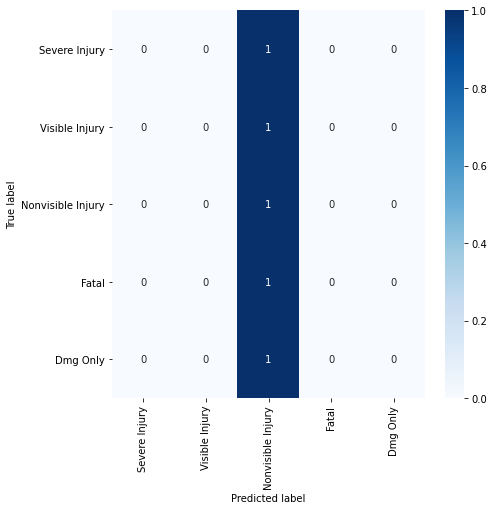

In [57]:
figure = plt.figure(figsize=(7, 7))
sns.heatmap(confusion_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [58]:
print(crash_classes['Crash_Severity_A.Severe Injury'].value_counts()[1])
print(crash_classes['Crash_Severity_B.Visible Injury'].value_counts()[1])
print(crash_classes['Crash_Severity_C.Nonvisible Injury'].value_counts()[1])
print(crash_classes['Crash_Severity_K.Fatal Injury'].value_counts()[1])
print(crash_classes['Crash_Severity_PDO.Property Damage Only'].value_counts()[1])

44907
174736
82540
5172
586308
